<a href="https://colab.research.google.com/github/shubhamshinde3/Market_Segmentation_Automobile/blob/main/DL_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Train.csv')

In [6]:
data.shape

(8068, 11)

In [7]:
#understanding the data by getting first 5 lines of dataset
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
# describe Meta-Data of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
#droping the unnecessary column
data.drop(columns = ['ID'],inplace = True)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
data.corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.190789,-0.280517
Work_Experience,-0.190789,1.000000,-0.063234
Family_Size,-0.280517,-0.063234,1.000000


In [11]:
data['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [12]:
data['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [13]:
gb_ = data.groupby(by=["Gender"]).aggregate({"Spending_Score":"sum"})
gb_

,Spending_Score
Gender,
Female,AverageLowHighLowLowAverageLowLowLowLowLowHigh...
Male,LowHighAverageLowLowLowLowAverageLowLowAverage...


In [14]:
gb_ = data.groupby(by=["Profession"]).aggregate({"Segmentation":"count"})
gb_

,Segmentation
Profession,
Artist,2516
Doctor,688
Engineer,699
Entertainment,949
Executive,599
Healthcare,1332
Homemaker,246
Lawyer,623
Marketing,292


In [15]:
data.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
Segmentation        4
dtype: int64

In [16]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

def cat_to_num(c,data): 
  for i in range(len(c)):
    data.iloc[:,c[i]] = la.fit_transform(data.iloc[:,c[i]])
    print('\nSkewness for Column: ',skew(data.iloc[:,c[i]]))
  return data.sample(3)

In [18]:

col = ['Spending_Score']
for i in col:
    data[i] = la.fit_transform(data[i])


In [19]:
data.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5032,Male,Yes,42,Yes,Entertainment,1.0,2,2.0,Cat_6,D
258,Male,No,38,Yes,Artist,8.0,2,3.0,Cat_2,A
5874,Female,Yes,49,Yes,Artist,1.0,0,2.0,Cat_6,C
7720,Male,No,35,Yes,Artist,9.0,2,2.0,Cat_3,A
3104,Female,NaN,38,Yes,Executive,0.0,1,1.0,Cat_3,D


In [20]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [21]:
# describing the numerical data which gives summary of all the mathematical things like mean ,max, std deviation etc
data.describe()

,Age,Work_Experience,Spending_Score,Family_Size
count,8068.000000,7239.000000,8068.000000,7733.000000
mean,43.466906,2.641663,1.359941,2.850123
std,16.711696,3.406763,0.848418,1.531413
min,18.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,1.000000,2.000000
50%,40.000000,1.000000,2.000000,3.000000
75%,53.000000,4.000000,2.000000,4.000000
max,89.000000,14.000000,2.000000,9.000000


In [22]:
gb_female = data.groupby(by=["Gender"])
fe =gb_female.get_group("Female")
fe

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,Female,Yes,38,Yes,Engineer,NaN,0,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,2,1.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,1,6.0,Cat_6,A
7,Female,No,33,Yes,Healthcare,1.0,2,3.0,Cat_6,D
8,Female,Yes,61,Yes,Engineer,0.0,2,3.0,Cat_7,D
...,...,...,...,...,...,...,...,...,...,...
8052,Female,No,37,Yes,Artist,8.0,2,2.0,Cat_6,C
8058,Female,No,31,Yes,Entertainment,0.0,2,3.0,Cat_3,A
8060,Female,Yes,48,Yes,Artist,0.0,0,6.0,Cat_6,A
8065,Female,No,33,Yes,Healthcare,1.0,2,1.0,Cat_6,D


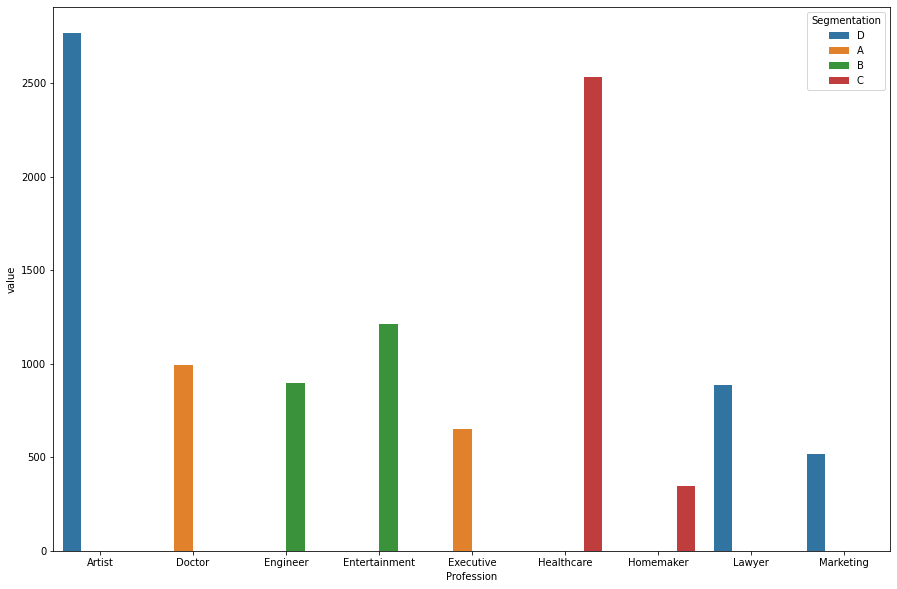

In [23]:
gb_data=data.groupby(by=["Profession"]).aggregate({"Spending_Score":"sum"})
res=gb_data.reset_index()
res_wide=res.melt(id_vars="Profession")
plt.figure(figsize=(15,10))
sns.barplot(x="Profession", y="value",data=res_wide, hue=data['Segmentation'])
plt.show()
# The people who are artist had spend highest on car who belongs to the D category
#Profession wise Spending score from 4 different categories

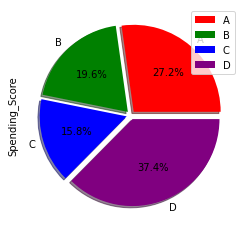

In [24]:
explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors =['red', 'green','blue', 'purple']
data.groupby(['Segmentation']).sum().plot(kind='pie', y='Spending_Score', autopct='%1.1f%%', colors=colors, explode=explode,shadow=True)

<Figure size 1080x720 with 0 Axes>

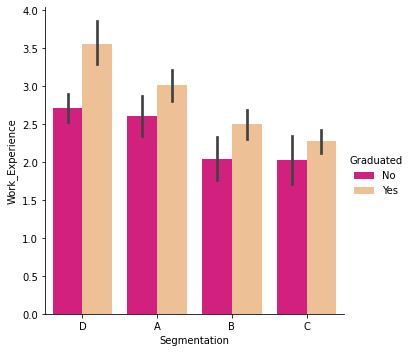

In [25]:
#How graduted people with experience categories in different segements
plt.figure(figsize=(15,10))
bar = sns.catplot(x='Segmentation', y='Work_Experience', hue='Graduated', data = data , kind="bar", palette="Accent_r")

In [26]:
#Affect of Ever_Married on Customer Segmentation'
import plotly.express as px
plot_data = data.groupby(['Ever_Married', 'Segmentation'])['Ever_Married'].agg({'count'}).reset_index()
fig = px.sunburst(plot_data, path = ['Ever_Married', 'Segmentation'], values = 'count', color = ('Ever_Married'), width = 400, height = 400)
fig.update_traces(textinfo = 'label + percent parent')
fig.show()

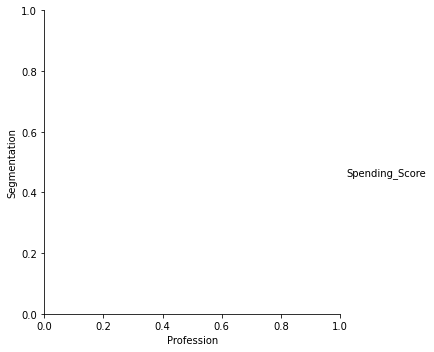

In [27]:
#1.data analysis
sns.lmplot(x='Profession', y='Segmentation', hue='Spending_Score',data=data.loc[data['Spending_Score'].isin(['Low', 'High'])], fit_reg=False)

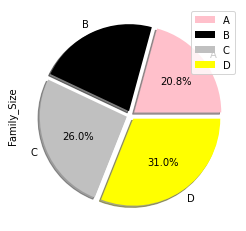

In [28]:
explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors =['pink', 'black','silver', 'yellow']
data.groupby(['Segmentation']).sum().plot(kind='pie', y='Family_Size', autopct='%1.1f%%', colors=colors, explode=explode,shadow=True)

In [29]:
#ask 15 quality questions
#understanding of use case(what problem actully is and how you are solving it)
#EDA
#EDA 7 analysis

In [30]:
for column in ['Ever_Married','Graduated','Work_Experience', 'Family_Size', 'Var_1']:
    data[column].fillna(data[column].mode()[0], inplace=True)

**Feature Engineering**

***#1Imputation***

In [31]:
# check the percentage of NA values in dataset
data.isnull().mean()

Gender             0.000000
Ever_Married       0.000000
Age                0.000000
Graduated          0.000000
Profession         0.015369
Work_Experience    0.000000
Spending_Score     0.000000
Family_Size        0.000000
Var_1              0.000000
Segmentation       0.000000
dtype: float64

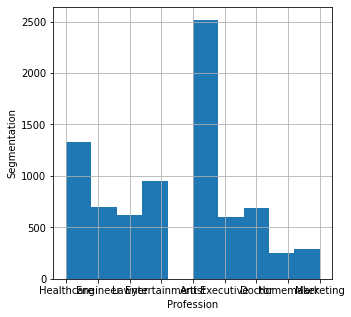

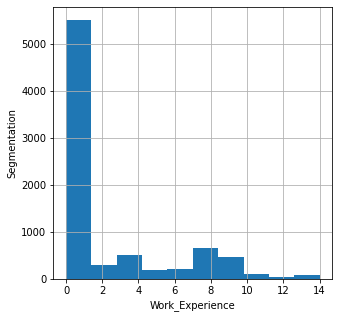

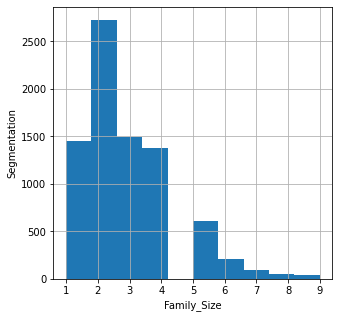

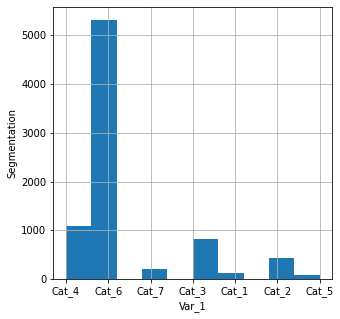

In [32]:
# plot the distribution of columns to find out if they are Gaussian or skewed.
for column in ['Profession','Work_Experience', 'Family_Size', 'Var_1']:
  #print('\nSkewness for Column: ',skew(data[column]))
  plt.figure(figsize=(5,5))
  fig = data[column].hist(bins=10)
  fig.set_ylabel('Segmentation')
  fig.set_xlabel(column)


We can see that the data columns distribution is skewed. So, we will use the median imputation

In [33]:
for column in ['Ever_Married','Graduated','Profession', 'Var_1']:
  data[column].fillna(data[column].mode()[0], inplace=True)

In [34]:
for column in ['Work_Experience', 'Family_Size']:
  data[column].fillna(data[column].median(), inplace=True)

In [35]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,2,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,0,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,2,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,1,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,1,6.0,Cat_6,A


***#2Discretization***

In [36]:
data['HS']=np.where(data['Profession'].isin(['Artist', 'Entertainment']),'Higesht_Spender_',"NuLL")
data[['Spending_Score','Profession', 'HS']]

,Spending_Score,Profession,HS
0,2,Healthcare,NuLL
1,0,Engineer,NuLL
2,2,Engineer,NuLL
3,1,Lawyer,NuLL
4,1,Entertainment,Higesht_Spender_
...,...,...,...
8063,2,Artist,Higesht_Spender_
8064,2,Executive,NuLL
8065,2,Healthcare,NuLL
8066,2,Healthcare,NuLL


In [48]:
#droping the unnecessary column
data.drop(columns = ['HS'],inplace = True)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


***#3Categorical Encoding***

In [49]:
#method 1: using function
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

def cat_to_num(c,data): 
  for i in range(len(c)):
    data.iloc[:,c[i]] = la.fit_transform(data.iloc[:,c[i]])
    print('\nSkewness for Column: ',skew(data.iloc[:,c[i]]))
  return data.sample(3)

In [50]:
#method 2: using loop
col = ['Gender'	,'Ever_Married','Graduated'	,'Profession','Var_1', 'Segmentation']
for i in col:
    data[i] = la.fit_transform(data[i])

In [51]:
data.sample(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3440,1,0,28,0,3,6.0,2,3.0,5,0
3166,1,1,62,0,0,1.0,0,2.0,5,2
4013,0,1,37,1,0,2.0,2,2.0,6,2


***#4Handling Outliers***

In [52]:
def outlier_detect(c_name):
    sns.boxplot(data[c_name])
    plt.show()
            
    stop_cri = 3
    length = len(c_name)
    
            
    #formula to calculate z score 
    data["col_zscore"]  = (data[c_name] - data[c_name].mean())/data[c_name].std()
            
    for i in range(length):
      od = [o for o in data["col_zscore"] if(o > stop_cri or  o < - stop_cri)] # comparing z - score with 3 std deviation
    outliers = pd.DataFrame(od)
    print("outliers:")
    return outliers

In [53]:
def outlier(c_name):
  sns.boxplot(data[c_name])
  plt.show()

  mean = np.mean(data[c_name])
  std = np.std(data[c_name])
  threshold = 3
  outlier = []
  for i in data[c_name]:
      z = (i-mean)/std
      if z > threshold:
          outlier.append(i)
  print('outlier in dataset:', outlier)
  print(len(outlier))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



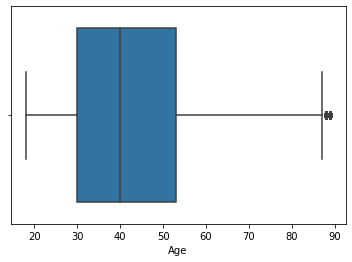

outlier in dataset: []
0


In [54]:
outlier('Age')

No outlier detected in column age 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



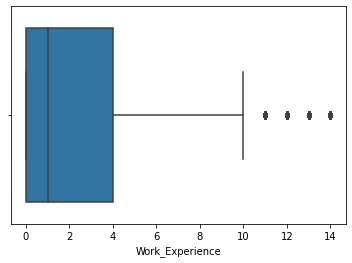

outlier in dataset: [13.0, 14.0, 14.0, 13.0, 14.0, 13.0, 14.0, 14.0, 14.0, 13.0, 13.0, 14.0, 14.0, 13.0, 14.0, 14.0, 14.0, 13.0, 14.0, 14.0, 13.0, 14.0, 13.0, 13.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 14.0, 13.0, 14.0, 13.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 14.0, 13.0, 14.0, 13.0, 13.0, 14.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 13.0, 13.0, 13.0, 14.0, 14.0, 13.0, 13.0, 14.0, 13.0, 13.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 13.0, 14.0]
91


In [55]:

outlier('Work_Experience')

There are 91 outliers present in column work_experience which we will handle by replacing it with appropriate imputation.

 ***#5Variable  Transformations***

In [56]:
for column in ['Gender'	,'Ever_Married',	'Age'	,'Graduated','Spending_Score' ,'Segmentation',	'Profession','Work_Experience', 'Family_Size', 'Var_1']:
  print('\nSkewness for {}:'.format(column),skew(data[column]))


Skewness for Gender: -0.19074763126825195

Skewness for Ever_Married: -0.37791483112933044

Skewness for Age: 0.6958911756958159

Skewness for Graduated: -0.5183100800881524

Skewness for Spending_Score: -0.7597022225560356

Skewness for Segmentation: -0.0784170161177935

Skewness for Profession: 0.4265501890703328

Skewness for Work_Experience: 1.4728552661540355

Skewness for Family_Size: 1.0755365898089138

Skewness for Var_1: -1.2069719243175248


In [57]:
for column in ['Gender'	,'Ever_Married',	'Age'	,'Graduated','Spending_Score','Segmentation' ,	'Profession','Work_Experience', 'Family_Size', 'Var_1']:
    tar=np.log(data[column])
    print("Skewness:", tar.skew())
#values transformed and distributed normally`

Skewness: nan
Skewness: nan
Skewness: -0.05243989561012818
Skewness: nan
Skewness: nan
Skewness: nan
Skewness: nan
Skewness: nan
Skewness: -0.15193377197321453
Skewness: nan


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



Positive value means the distribution is skewed to the right.

Negative value means the distribution is skewed to the left.

0 means perfect normal distribution. The bell shaped curve.

***#6Scaling***

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
data1 = sc.fit_transform(data)

In [64]:
data1

array([[ 0.90916397, -1.2066533 , -1.28462344, ...,  0.78553624,
        -0.80837004,  1.26258107],
       [-1.0999116 ,  0.82873846, -0.32715082, ...,  0.1227349 ,
        -0.80837004, -1.3714055 ],
       [-1.0999116 ,  0.82873846,  1.40826831, ..., -1.20286777,
         0.60071054, -0.49340998],
       ...,
       [-1.0999116 , -1.2066533 , -0.62636101, ..., -1.20286777,
         0.60071054,  1.26258107],
       [-1.0999116 , -1.2066533 , -0.98541324, ...,  0.78553624,
         0.60071054, -0.49340998],
       [ 0.90916397,  0.82873846, -0.38699286, ...,  0.1227349 ,
        -0.80837004, -0.49340998]])

***#7Checking important  Features***

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = data.iloc[:,:9]
y=data.iloc[:,-1].values

In [76]:
bfea = SelectKBest(score_func=chi2,k='all')
fit=bfea.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
IMPFea=pd.concat([dfcolumns,dfscores],axis=1)
IMPFea.columns=['Column_name','Score']
IMPFea

,Column_name,Score
0,Gender,5.171987
1,Ever_Married,557.259807
2,Age,7813.002119
3,Graduated,397.167676
4,Profession,2397.681650
5,Work_Experience,244.765697
6,Spending_Score,764.333942
7,Family_Size,225.525530
8,Var_1,51.720135
